<a href="https://colab.research.google.com/github/bharshal/car_damage_detector/blob/master/pre_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import cv2
import json
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [ ]:
!ls "/content/drive/My Drive/task_artivartic"
!unzip "/content/drive/My Drive/task_artivartic/dataset_for_car_damage_detection.zip" -d "/content/drive/My Drive/task_artivartic/"

In [ ]:
!ls -R "/content/drive/My Drive/task_artivartic/dataset"

'/content/drive/My Drive/task_artivartic/dataset':
test  train  val

'/content/drive/My Drive/task_artivartic/dataset/test':
11.jpg	12.jpg	28.jpg	45.jpg	60.jpg	66.jpg	67.jpg	72.jpg

'/content/drive/My Drive/task_artivartic/dataset/train':
10.jpg	24.jpg	38.jpg	52.jpg	68.jpg	8.jpg
13.jpg	25.jpg	39.jpg	53.jpg	6.jpg	9.jpg
14.jpg	26.jpg	3.jpg	54.jpg	70.jpg	car-damage-train_attributes.json
15.jpg	27.jpg	40.jpg	55.jpg	71.jpg	car-damage-train.json
16.jpg	29.jpg	41.jpg	56.jpg	73.jpg	train_multiclass.json
17.jpg	2.jpg	42.jpg	57.jpg	74.jpg	via_region_data.csv
18.jpg	30.jpg	43.jpg	59.jpg	75.jpg	via_region_data.json
19.jpg	32.jpg	44.jpg	5.jpg	76.jpg
20.jpg	33.jpg	46.jpg	61.jpg	78.jpg
21.jpg	34.jpg	48.jpg	62.jpg	79.jpg
22.jpg	36.jpg	49.jpg	63.jpg	7.jpg
23.jpg	37.jpg	51.jpg	64.jpg	80.jpg

'/content/drive/My Drive/task_artivartic/dataset/val':
1.jpg	50.jpg	car-damage-val_attributes.json	via_region_data.json
31.jpg	58.jpg	car-damage-val.json
47.jpg	69.jpg	val_multiclass.json
4.jpg	77.jpg	via_region_dat

In [ ]:
with open("/content/drive/My Drive/task_artivartic/dataset/train/via_region_data.json") as f:
  _json1 = json.load(f)
print(_json1)
print(len(_json1.keys()))

{'2.jpg94448': {'filename': '2.jpg', 'size': 94448, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [626, 698, 793, 843, 900, 854, 789, 732, 678, 652, 620, 620, 620], 'all_points_y': [541, 502, 501, 542, 656, 721, 747, 762, 720, 691, 634, 574, 576]}, 'region_attributes': {'name': 'damage'}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [670, 698, 720, 694, 672, 670], 'all_points_y': [875, 868, 882, 897, 894, 887]}, 'region_attributes': {'name': 'damage'}}], 'file_attributes': {}}, '3.jpg100697': {'filename': '3.jpg', 'size': 100697, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [264, 247, 247, 249, 255, 261, 282, 288, 302, 307, 317, 328, 341, 355, 371, 382, 380, 357, 341, 326, 328, 313, 290, 276, 270, 270], 'all_points_y': [479, 488, 501, 521, 536, 537, 542, 545, 548, 559, 563, 564, 574, 574, 578, 576, 553, 551, 541, 536, 526, 523, 511, 509, 498, 483]}, 'region_attributes': {'name': 'damage'}}], 'file_attributes': {}}, '5.jpg75055

In [ ]:
with open("/content/drive/My Drive/task_artivartic/dataset/train/train_multiclass.json") as f:
  _json2 = json.load(f)
print(_json2)
print(len(_json2.keys()))

{'2.jpg94448': {'filename': '2.jpg', 'size': 94448, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [425, 526, 674, 1020, 1021, 956, 868, 829, 816, 659, 595, 564, 528, 457], 'all_points_y': [405, 843, 907, 935, 652, 658, 574, 470, 340, 317, 286, 417, 433, 412]}, 'region_attributes': {'name': 'rear_bumper'}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [572, 552, 552, 578, 610, 684, 820, 1020, 1023, 886], 'all_points_y': [46, 66, 145, 238, 295, 321, 337, 338, 58, 49]}, 'region_attributes': {'name': 'headlamp'}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [262, 133, 96, 96, 97, 88, 108, 142, 191, 246, 356, 315, 302, 264, 256, 279, 288, 285, 280, 276], 'all_points_y': [546, 371, 280, 204, 134, 88, 32, 11, 1, 4, 3, 145, 187, 264, 321, 321, 334, 475, 511, 544]}, 'region_attributes': {'name': 'door'}}], 'file_attributes': {}}, '3.jpg100697': {'filename': '3.jpg', 'size': 100697, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x

In [ ]:
keys = _json1.keys()
imgs = []
for key in keys:

	item1 = _json1[key]
	#print(item1)
	filename = item1['filename']
	#print(filename)
	img = cv2.imread("/content/drive/My Drive/task_artivartic/dataset/train/" + str(filename))
	regions = (item1['regions'])
	#print(regions)
	for region in regions:
		all_points_x = region['shape_attributes']['all_points_x']
		all_points_y = region['shape_attributes']['all_points_y']
		#print(all_points_x)
		pts = []
		for i in range(len(all_points_x)):
			pt = [all_points_x[i],all_points_y[i]]
			pts.append(pt)
		#print(pts)
		pts = np.array(pts, np.int32)
		pts = pts.reshape((-1,1,2))
		cv2.polylines(img,[pts],True,(0,255,255),thickness=2)


	item2 = _json2[key]
	#print(item2)
	regions = (item2['regions'])
	#print(regions)
	for region in regions:
		all_points_x = region['shape_attributes']['all_points_x']
		all_points_y = region['shape_attributes']['all_points_y']
		#print(all_points_x)
		pts = []
		for i in range(len(all_points_x)):
			pt = [all_points_x[i],all_points_y[i]]
			pts.append(pt)
		#print(pts)
		pts = np.array(pts, np.int32)
		pts = pts.reshape((-1,1,2))
		cv2.polylines(img,[pts],True,(255,0,255),thickness=2)
  
	imgs.append(img)

print(len(imgs))

62


In [ ]:
plt.figure(figsize=(30, 8))
imgs_ = imgs[0:4]
for i,image in enumerate(imgs_):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(' '.join(str(i).split('_')).title())
    plt.imshow(image)
plt.show()

plt.figure(figsize=(30, 8))
imgs_ = imgs[-4:]
for i,image in enumerate(imgs_):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(' '.join(str(i).split('_')).title())
    plt.imshow(image)
plt.show()

Creating car body part masks

In [ ]:
!mkdir "/content/drive/My Drive/task_artivartic/dataset/part_masks"

In [ ]:
def visualise(imgs):
  n = len(imgs)
  imgs[0] = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(30, 8))
  for i,image in enumerate(imgs):
      plt.subplot(1, n, i + 1)
      plt.xticks([])
      plt.yticks([])
      plt.title(' '.join(str(i).split('_')).title())
      plt.imshow(image)
  plt.show()

In [ ]:
with open("/content/drive/My Drive/task_artivartic/dataset/val/val_multiclass.json") as f:
  _json2 = json.load(f)
  keys = _json2.keys()
!mkdir "/content/drive/My Drive/task_artivartic/dataset/part_masks/val"

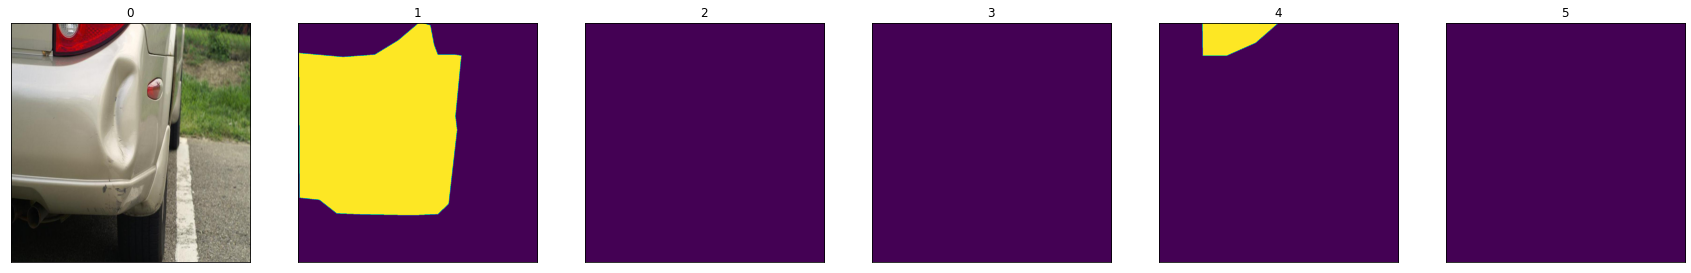

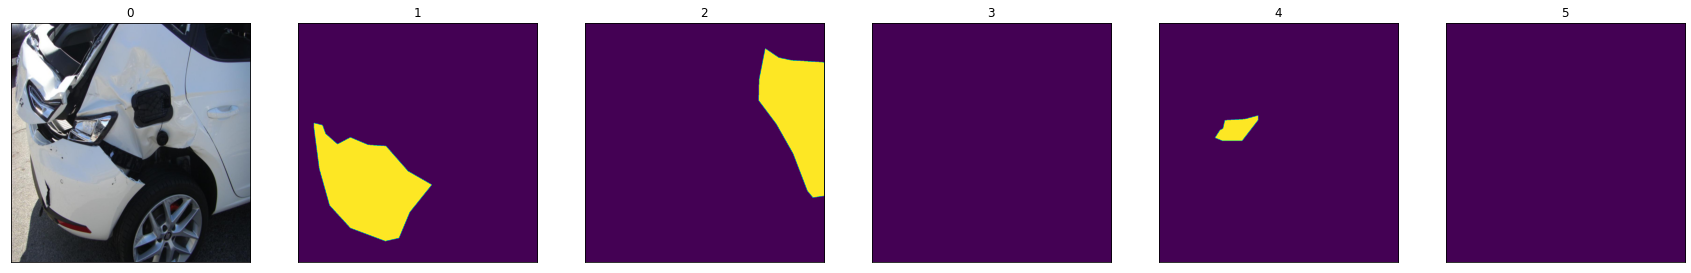

In [ ]:
count = 0
for key in keys:
  imgs = []
  item1 = _json2[key]
  filename = item1['filename']
  img = cv2.imread("/content/drive/My Drive/task_artivartic/dataset/val/" + str(filename))
  imgs.append(img)
  width,height,_ = img.shape

  hood = np.zeros([width,height],dtype='uint8')
  headlamp = np.zeros([width,height],dtype='uint8')
  front_bumper = np.zeros([width,height],dtype='uint8')
  door = np.zeros([width,height],dtype='uint8')
  rear_bumper = np.zeros([width,height],dtype='uint8')

  regions = (item1['regions'])
  
  for region in regions:
    name = region['region_attributes']['name']
    all_points_x = region['shape_attributes']['all_points_x']
    all_points_y = region['shape_attributes']['all_points_y']

    mask_pts = []

    for i in range(len(all_points_x)):
      mask_pt = (all_points_x[i],all_points_y[i])
      mask_pts.append(mask_pt)

    mask_pts = np.array(mask_pts, dtype='int32')

    if name == "hood":
      cv2.fillPoly(hood, [mask_pts], (255,0))
    if name == "headlamp":
      cv2.fillPoly(headlamp, [mask_pts], (255,0)) 
    if name == "front_bumper":
      cv2.fillPoly(front_bumper, [mask_pts], (255,0))
    if name == "door":
      cv2.fillPoly(door, [mask_pts], (255,0))
    if name == "rear_bumper":
      cv2.fillPoly(rear_bumper, [mask_pts], (255,0))

  imgs.append(rear_bumper.squeeze())
  imgs.append(door.squeeze())
  imgs.append(front_bumper.squeeze())
  imgs.append(headlamp.squeeze())
  imgs.append(hood.squeeze())

  final = np.dstack([hood,headlamp,front_bumper,door,rear_bumper])
  #print(final.shape)
  with open("/content/drive/My Drive/task_artivartic/dataset/part_masks/val/" + str(filename.split(".")[0])+'.npy', 'wb') as f:
    np.save(f,final)
  if count%5 == 0:
    visualise(imgs)
  count+=1

Creating masks for damage

In [ ]:
!mkdir "/content/drive/My Drive/task_artivartic/dataset/damage_masks"
!ls "/content/drive/My Drive/task_artivartic/dataset/damage_masks/"

mkdir: cannot create directory ‘/content/drive/My Drive/task_artivartic/dataset/damage_masks’: File exists


In [ ]:
with open("/content/drive/My Drive/task_artivartic/dataset/train/via_region_data.json") as f:
  _json1 = json.load(f)
  keys = _json1.keys()
#!mkdir "/content/drive/My Drive/task_artivartic/dataset/damage_masks/val"

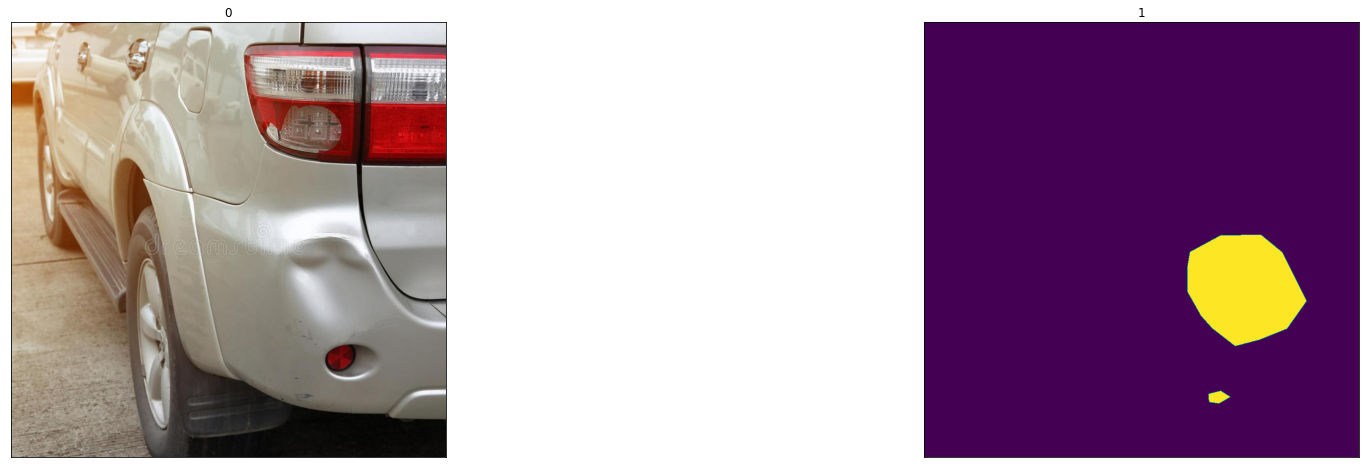

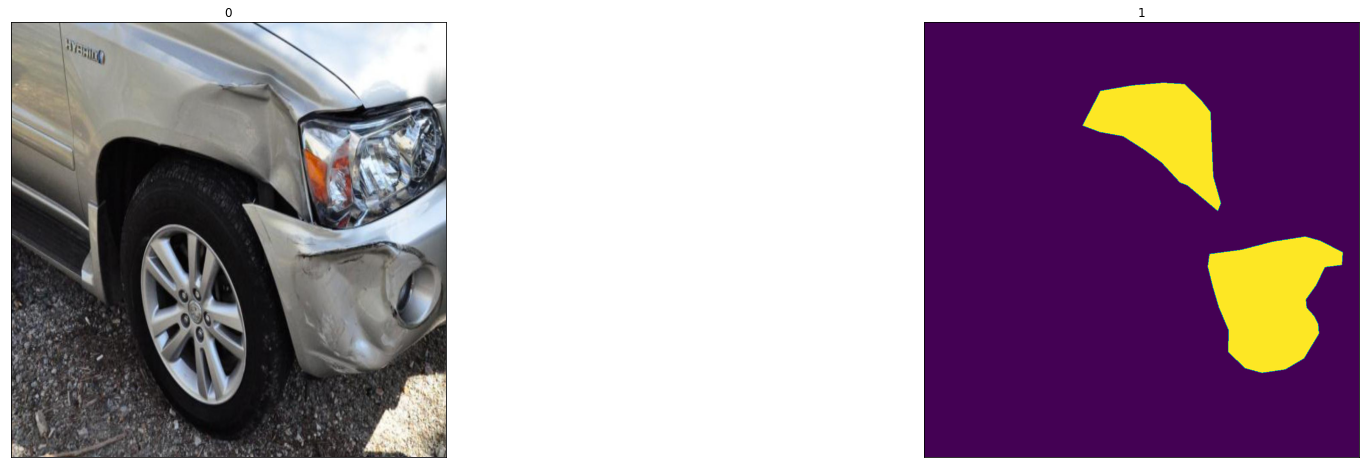

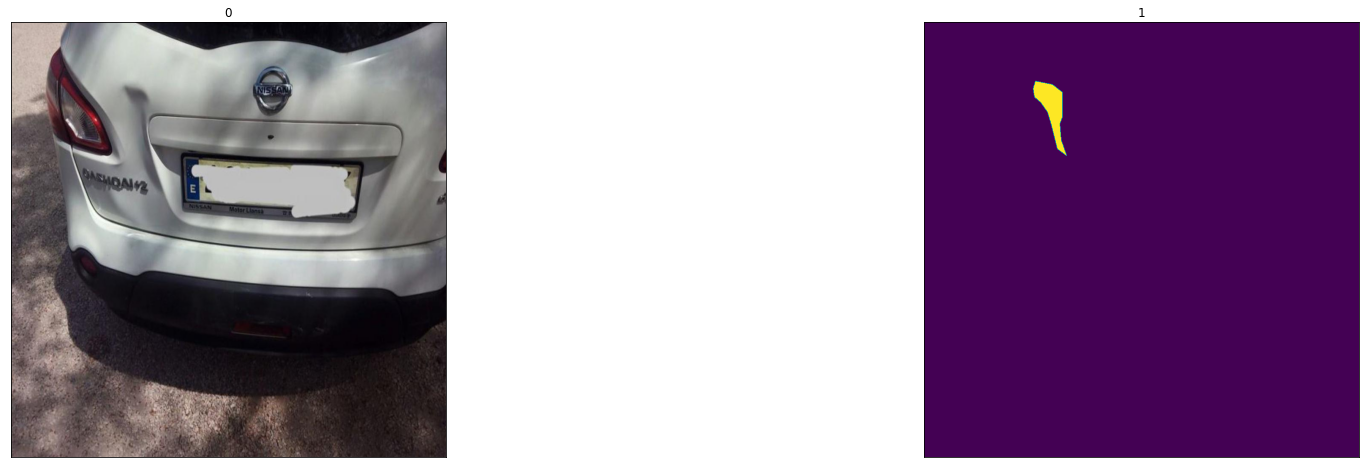

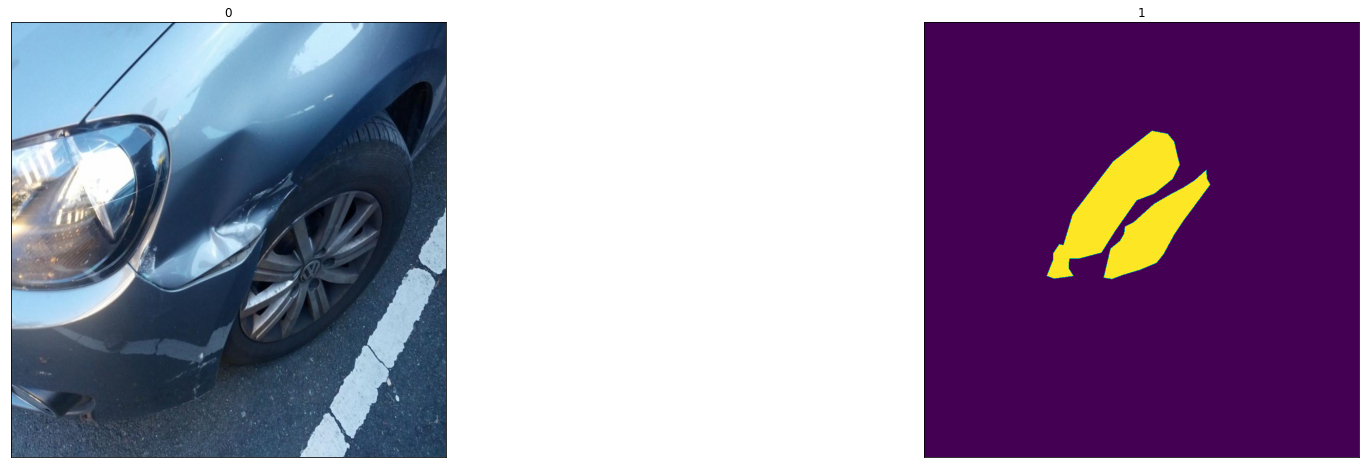

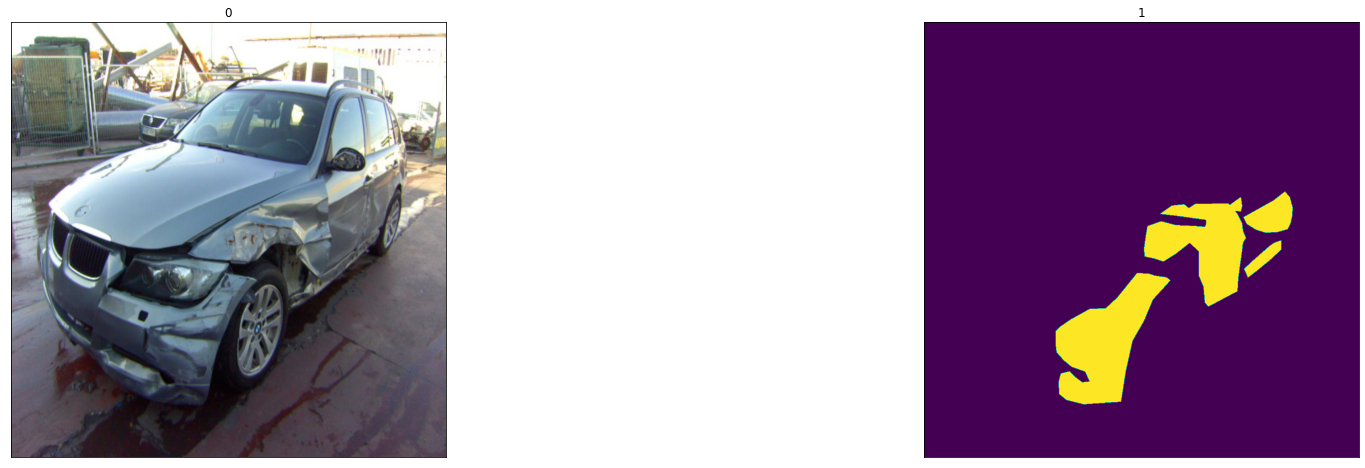

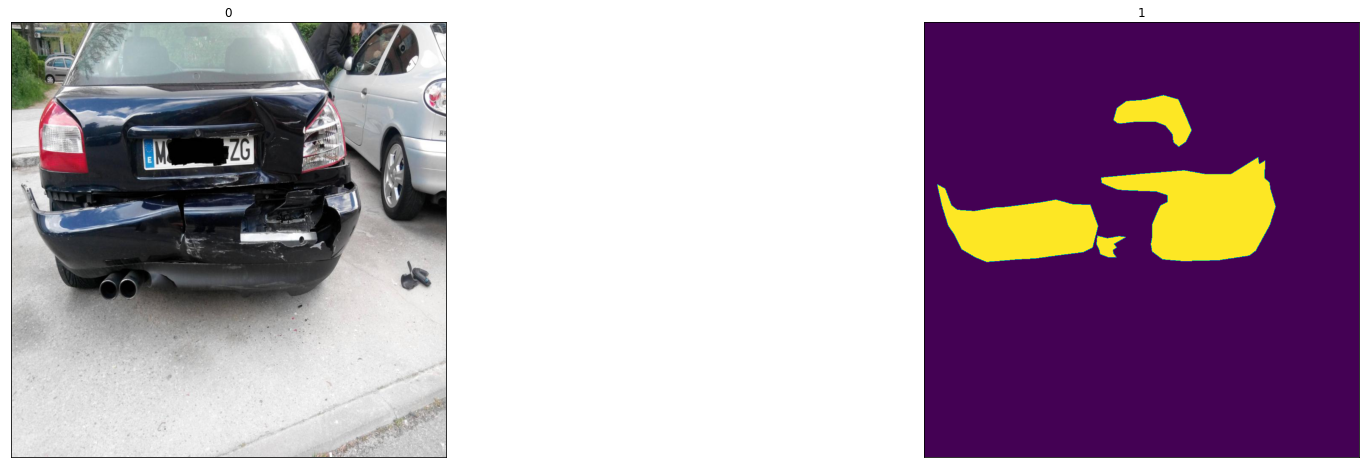

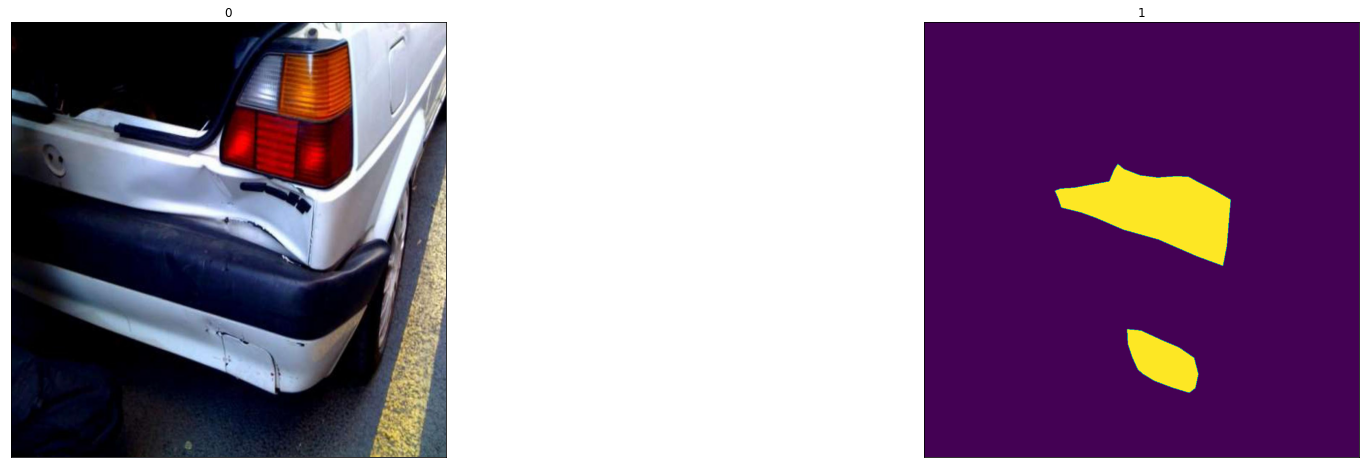

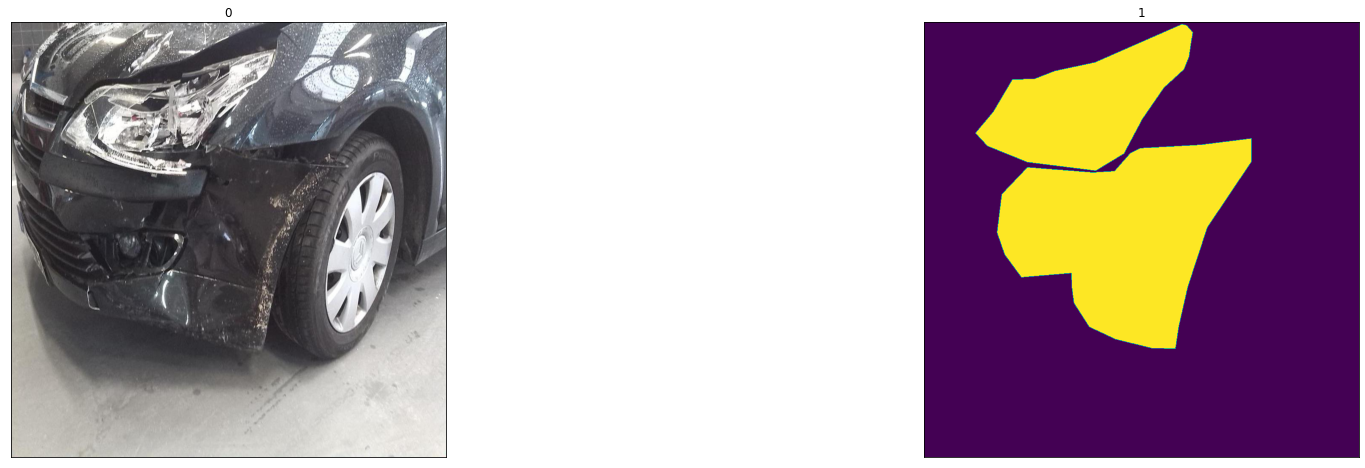

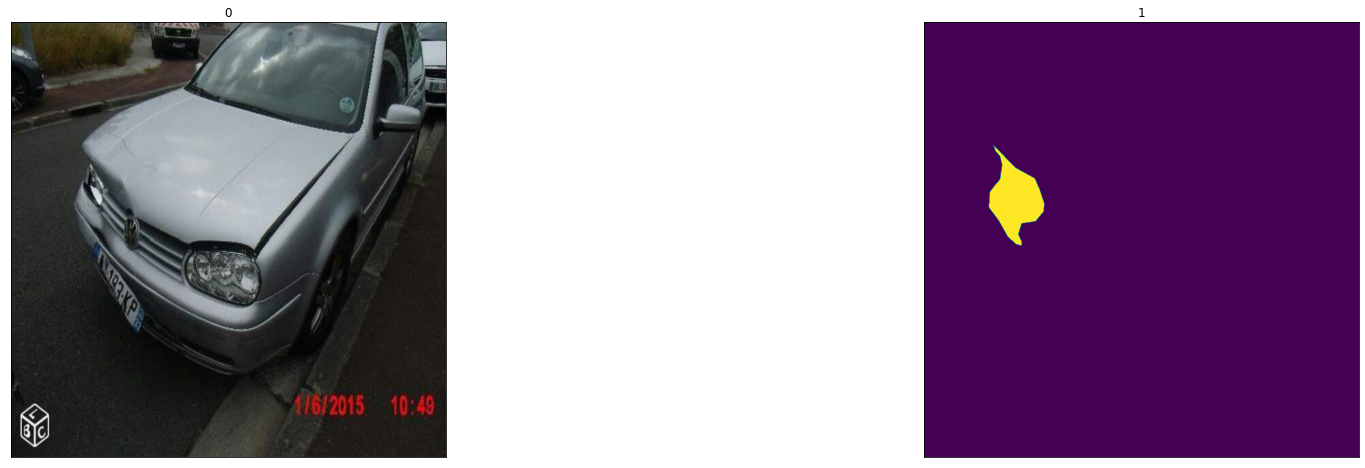

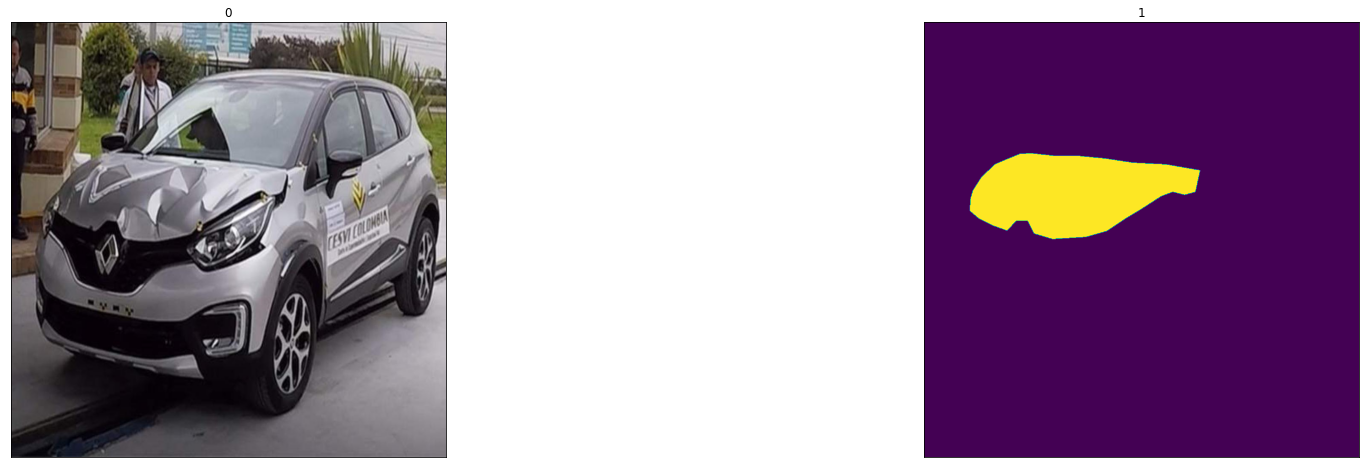

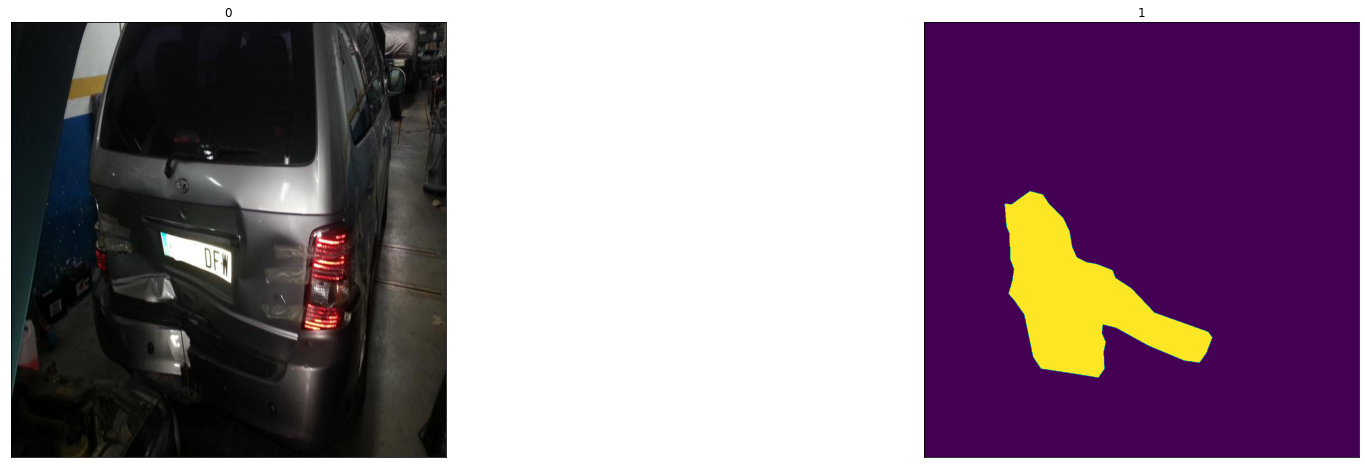

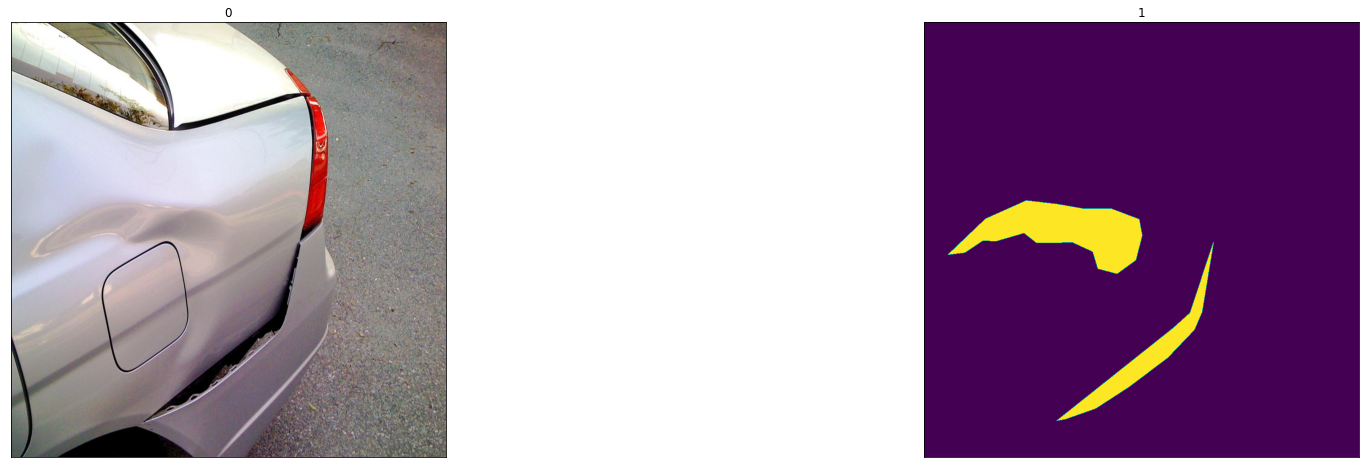

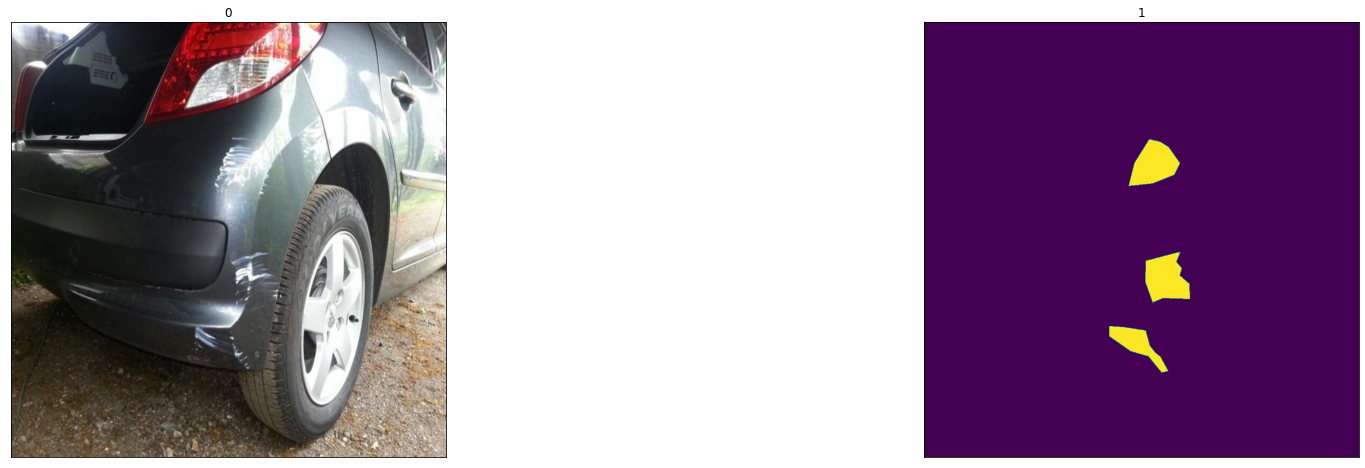

In [ ]:
count = 0
for key in keys:
  imgs = []
  item1 = _json1[key]
  filename = item1['filename']
  img = cv2.imread("/content/drive/My Drive/task_artivartic/dataset/train/" + str(filename))
  imgs.append(img)
  width,height,_ = img.shape

  damage = np.zeros([width,height],dtype='uint8')

  regions = (item1['regions'])
  
  for region in regions:
    all_points_x = region['shape_attributes']['all_points_x']
    all_points_y = region['shape_attributes']['all_points_y']
    mask_pts = []

    for i in range(len(all_points_x)):
      mask_pt = (all_points_x[i],all_points_y[i])
      mask_pts.append(mask_pt)

    mask_pts = np.array(mask_pts, dtype='int32')

    cv2.fillPoly(damage, [mask_pts], (255,0))
  imgs.append(damage)

  with open("/content/drive/My Drive/task_artivartic/dataset/damage_masks/" + str(filename.split(".")[0])+'.npy', 'wb') as f:
    np.save(f,damage)
  if count%5 == 0:
    visualise(imgs)
  count+=1

In [ ]:
!ls -l "/content/drive/My Drive/task_artivartic/dataset/damage_masks"

total 63523
-rw------- 1 root root 1048704 Jul 11 19:08 10.npy
-rw------- 1 root root 1048704 Jul 11 19:08 13.npy
-rw------- 1 root root 1048704 Jul 11 19:08 14.npy
-rw------- 1 root root 1048704 Jul 11 19:08 15.npy
-rw------- 1 root root 1048704 Jul 11 19:08 16.npy
-rw------- 1 root root 1048704 Jul 11 19:08 17.npy
-rw------- 1 root root 1048704 Jul 11 19:08 18.npy
-rw------- 1 root root 1048704 Jul 11 19:08 19.npy
-rw------- 1 root root 1048704 Jul 11 19:08 20.npy
-rw------- 1 root root 1048704 Jul 11 19:08 21.npy
-rw------- 1 root root 1048704 Jul 11 19:08 22.npy
-rw------- 1 root root 1048704 Jul 11 19:08 23.npy
-rw------- 1 root root 1048704 Jul 11 19:08 24.npy
-rw------- 1 root root 1048704 Jul 11 19:08 25.npy
-rw------- 1 root root 1048704 Jul 11 19:08 26.npy
-rw------- 1 root root 1048704 Jul 11 19:08 27.npy
-rw------- 1 root root 1048704 Jul 11 19:08 29.npy
-rw------- 1 root root 1048704 Jul 11 19:08 2.npy
-rw------- 1 root root 1048704 Jul 11 19:08 30.npy
-rw------- 1 root ro